In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


Reading Data

In [26]:
train_df = pd.read_csv('train.csv', index_col='Id')
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


# **Training data analysis and preparation**

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [28]:
train_df.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [29]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [31]:
train_df.shape

(1460, 80)

# Visualization and Analysis

In [32]:
train_df['SalePrice'].describe

<bound method NDFrame.describe of Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64>

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

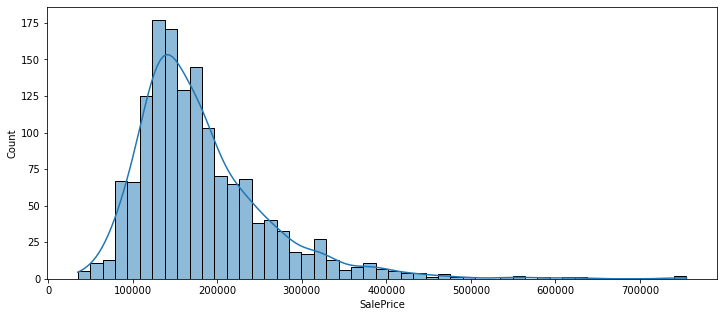

In [33]:
plt.figure(figsize=(12,5))
sns.histplot(train_df['SalePrice'], kde=True)


<AxesSubplot:>

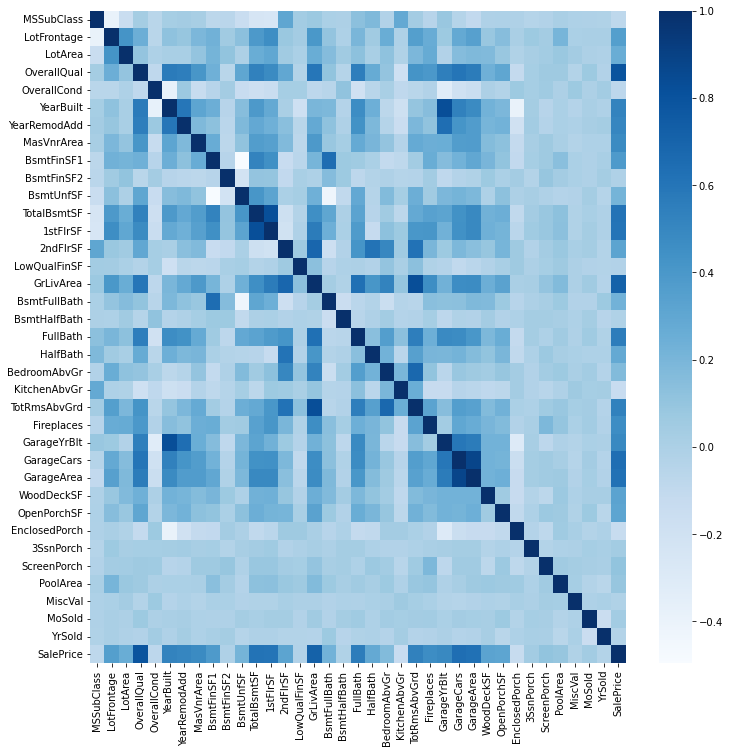

In [34]:
#Heat map to descripe the correlations between numerical varibles
plt.figure(figsize=(12, 12))
sns.heatmap(train_df.corr(), cmap = 'Blues')

In [35]:
train_df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [36]:
#correlation of varibale with Saleprice
corr_sale = train_df.corr()['SalePrice']
corr_sale

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [37]:
#Columns that effects sales price

imp_cols = list(corr_sale[(corr_sale>0.5)].index)
print(imp_cols)
print(len(imp_cols))

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']
11


In [38]:
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
cat_cols

['MSZoning',
 'Utilities',
 'BldgType',
 'Heating',
 'KitchenQual',
 'SaleCondition',
 'LandSlope']

In [39]:
imp = imp_cols + cat_cols
print(imp)


['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice', 'MSZoning', 'Utilities', 'BldgType', 'Heating', 'KitchenQual', 'SaleCondition', 'LandSlope']


In [40]:
train_df = train_df[imp]
train_df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
Id,,,,,,,,,,,,,,,,,,
1,7,2003,2003,856,856,1710,2,8,2,548,208500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
2,6,1976,1976,1262,1262,1262,2,6,2,460,181500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
3,7,2001,2002,920,920,1786,2,6,2,608,223500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
4,7,1915,1970,756,961,1717,1,7,3,642,140000,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
5,8,2000,2000,1145,1145,2198,2,9,3,836,250000,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,6,1999,2000,953,953,1647,2,7,2,460,175000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1457,6,1978,1988,1542,2073,2073,2,7,2,500,210000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1458,7,1941,2006,1152,1188,2340,2,9,1,252,266500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


# Missing values check

In [41]:
train_df.isnull()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
Id,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
train_df.isnull().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64

In [43]:
y = train_df['SalePrice']
X = train_df.drop('SalePrice',axis = 1)

In [44]:
X

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
Id,,,,,,,,,,,,,,,,,
1,7,2003,2003,856,856,1710,2,8,2,548,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
2,6,1976,1976,1262,1262,1262,2,6,2,460,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
3,7,2001,2002,920,920,1786,2,6,2,608,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
4,7,1915,1970,756,961,1717,1,7,3,642,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
5,8,2000,2000,1145,1145,2198,2,9,3,836,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,6,1999,2000,953,953,1647,2,7,2,460,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1457,6,1978,1988,1542,2073,2073,2,7,2,500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1458,7,1941,2006,1152,1188,2340,2,9,1,252,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


In [45]:
y

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [46]:
#converting categories features into numericals

X = pd.get_dummies(X,columns = cat_cols)
X

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
Id,,,,,,,,,,,,,,,,,,,,,
1,7,2003,2003,856,856,1710,2,8,2,548,...,0,0,0,0,0,1,0,1,0,0
2,6,1976,1976,1262,1262,1262,2,6,2,460,...,1,0,0,0,0,1,0,1,0,0
3,7,2001,2002,920,920,1786,2,6,2,608,...,0,0,0,0,0,1,0,1,0,0
4,7,1915,1970,756,961,1717,1,7,3,642,...,0,1,0,0,0,0,0,1,0,0
5,8,2000,2000,1145,1145,2198,2,9,3,836,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,6,1999,2000,953,953,1647,2,7,2,460,...,1,0,0,0,0,1,0,1,0,0
1457,6,1978,1988,1542,2073,2073,2,7,2,500,...,1,0,0,0,0,1,0,1,0,0
1458,7,1941,2006,1152,1188,2340,2,9,1,252,...,0,0,0,0,0,1,0,1,0,0


In [47]:
test_df = pd.read_csv('test.csv', index_col='Id')
test_df



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [48]:
imp_test = imp
imp_test.remove('SalePrice')
print(imp_test)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'MSZoning', 'Utilities', 'BldgType', 'Heating', 'KitchenQual', 'SaleCondition', 'LandSlope']


In [49]:
test_df = test_df[imp_test]
test_df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
Id,,,,,,,,,,,,,,,,,
1461,5,1961,1961,882.0,896,896,1,5,1.0,730.0,RH,AllPub,1Fam,GasA,TA,Normal,Gtl
1462,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1463,5,1997,1998,928.0,928,1629,2,6,2.0,482.0,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1464,6,1998,1998,926.0,926,1604,2,7,2.0,470.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1465,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0,RL,AllPub,TwnhsE,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,4,1970,1970,546.0,546,1092,1,5,0.0,0.0,RM,AllPub,Twnhs,GasA,TA,Normal,Gtl
2916,4,1970,1970,546.0,546,1092,1,6,1.0,286.0,RM,AllPub,TwnhsE,GasA,TA,Abnorml,Gtl
2917,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0,RL,AllPub,1Fam,GasA,TA,Abnorml,Gtl


In [50]:
X_test = test_df
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
Id,,,,,,,,,,,,,,,,,
1461,5,1961,1961,882.0,896,896,1,5,1.0,730.0,RH,AllPub,1Fam,GasA,TA,Normal,Gtl
1462,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1463,5,1997,1998,928.0,928,1629,2,6,2.0,482.0,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1464,6,1998,1998,926.0,926,1604,2,7,2.0,470.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1465,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0,RL,AllPub,TwnhsE,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,4,1970,1970,546.0,546,1092,1,5,0.0,0.0,RM,AllPub,Twnhs,GasA,TA,Normal,Gtl
2916,4,1970,1970,546.0,546,1092,1,6,1.0,286.0,RM,AllPub,TwnhsE,GasA,TA,Abnorml,Gtl
2917,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0,RL,AllPub,1Fam,GasA,TA,Abnorml,Gtl


In [51]:
X_test = pd.get_dummies(test_df, columns = cat_cols)
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
Id,,,,,,,,,,,,,,,,,,,,,
1461,5,1961,1961,882.0,896,896,1,5,1.0,730.0,...,1,0,0,0,0,1,0,1,0,0
1462,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0,...,0,0,0,0,0,1,0,1,0,0
1463,5,1997,1998,928.0,928,1629,2,6,2.0,482.0,...,1,0,0,0,0,1,0,1,0,0
1464,6,1998,1998,926.0,926,1604,2,7,2.0,470.0,...,0,0,0,0,0,1,0,1,0,0
1465,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,4,1970,1970,546.0,546,1092,1,5,0.0,0.0,...,1,0,0,0,0,1,0,1,0,0
2916,4,1970,1970,546.0,546,1092,1,6,1.0,286.0,...,1,1,0,0,0,0,0,1,0,0
2917,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0,...,1,1,0,0,0,0,0,1,0,0


In [52]:

print(len(X_test.columns))
X_test.columns

38


Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Utilities_AllPub', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'Heating_GasA',
       'Heating_GasW', 'Heating_Grav', 'Heating_Wall', 'KitchenQual_Ex',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'LandSlope_Gtl', 'LandSlope_Mod',
       'LandSlope_Sev'],
      dtype='object')

In [53]:

print(len(X.columns))
X.columns

41


Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Utilities_AllPub', 'Utilities_NoSeWa', 'BldgType_1Fam',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'Heating_Floor', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'KitchenQual_Ex',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'LandSlope_Gtl', 'LandSlope_Mod',
       'LandSlope_Sev'],
      dtype='object')

In [54]:
missing_cols = set(X.columns ) - set(X_test.columns )
for c in missing_cols:
    X_test[c] = 0
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Utilities_NoSeWa,Heating_OthW,Heating_Floor
Id,,,,,,,,,,,,,,,,,,,,,
1461,5,1961,1961,882.0,896,896,1,5,1.0,730.0,...,0,0,1,0,1,0,0,0,0,0
1462,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0,...,0,0,1,0,1,0,0,0,0,0
1463,5,1997,1998,928.0,928,1629,2,6,2.0,482.0,...,0,0,1,0,1,0,0,0,0,0
1464,6,1998,1998,926.0,926,1604,2,7,2.0,470.0,...,0,0,1,0,1,0,0,0,0,0
1465,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,4,1970,1970,546.0,546,1092,1,5,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0
2916,4,1970,1970,546.0,546,1092,1,6,1.0,286.0,...,0,0,0,0,1,0,0,0,0,0
2917,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0,...,0,0,0,0,1,0,0,0,0,0


# Standard Scaler

In [55]:
imp_col1 = imp_cols
imp_col1.remove('SalePrice')
imp_col1

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR


In [57]:
#scaling the training values

scaler = StandardScaler()
X[imp_col1] = scaler.fit_transform(X[imp_col1])
X

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
Id,,,,,,,,,,,,,,,,,,,,,
1,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,...,0,0,0,0,0,1,0,1,0,0
2,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
3,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,...,0,0,0,0,0,1,0,1,0,0
4,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,...,0,1,0,0,0,0,0,1,0,0
5,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,-0.071836,0.918511,0.733308,-0.238122,-0.542435,0.250402,0.789741,0.296763,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
1457,-0.071836,0.222975,0.151865,1.104925,2.355701,1.061367,0.789741,0.296763,0.311725,0.126420,...,1,0,0,0,0,1,0,1,0,0
1458,0.651479,-1.002492,1.024029,0.215641,0.065656,1.569647,0.789741,1.527656,-1.026858,-1.033914,...,0,0,0,0,0,1,0,1,0,0


In [58]:
#scaling the test dataset values

X_test[imp_col1] = scaler.transform(X_test[imp_col1])
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Utilities_NoSeWa,Heating_OthW,Heating_Floor
Id,,,,,,,,,,,,,,,,,,,,,
1461,-0.795151,-0.340077,-1.156380,-0.400017,-0.689929,-1.179256,-1.026041,-0.934130,-1.026858,1.202536,...,0,0,1,0,1,0,0,0,0,0
1462,-0.071836,-0.439440,-1.301740,0.619239,0.430511,-0.354966,-1.026041,-0.318683,-1.026858,-0.753188,...,0,0,1,0,1,0,0,0,0,0
1463,-0.795151,0.852269,0.636400,-0.295127,-0.607125,0.216136,0.789741,-0.318683,0.311725,0.042202,...,0,0,1,0,1,0,0,0,0,0
1464,-0.071836,0.885390,0.636400,-0.299687,-0.612300,0.168544,0.789741,0.296763,0.311725,-0.013943,...,0,0,1,0,1,0,0,0,0,0
1465,1.374795,0.686666,0.345679,0.507509,0.303718,-0.448246,0.789741,-0.934130,0.311725,0.154492,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,-1.518467,-0.041991,-0.720298,-1.166169,-1.595596,-0.806136,-1.026041,-0.934130,-2.365440,-2.212963,...,0,0,1,0,1,0,0,0,0,0
2916,-1.518467,-0.041991,-0.720298,-1.166169,-1.595596,-0.806136,-1.026041,-0.318683,-1.026858,-0.874836,...,0,0,0,0,1,0,0,0,0,0
2917,-0.795151,-0.373198,0.539493,0.379817,0.158811,-0.554851,-1.026041,0.296763,0.311725,0.482006,...,0,0,0,0,1,0,0,0,0,0


In [59]:
#splitting dataset into training and testing dataset
X_train,X_test_new,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
Id,,,,,,,,,,,,,,,,,,,,,
255,-0.795151,-0.472560,-1.350194,0.585036,0.391697,-0.383521,-1.026041,-0.934130,-1.026858,-0.837406,...,1,0,0,0,0,1,0,1,0,0
1067,-0.071836,0.719786,0.442586,-0.589275,-0.940928,0.105723,0.789741,0.296763,0.311725,-0.435032,...,1,0,0,0,0,1,0,1,0,0
639,-0.795151,-2.029235,-1.689368,-0.596115,-0.948691,-1.369623,-1.026041,-1.549576,-2.365440,-2.212963,...,1,0,0,0,0,1,0,1,0,0
800,-0.795151,-1.134975,-1.689368,-0.744329,-0.469981,0.480746,-1.026041,0.296763,-1.026858,-1.090059,...,0,0,0,0,0,1,0,1,0,0
381,-0.795151,-1.565545,-1.689368,-0.071666,-0.353538,0.334164,0.789741,-0.318683,-1.026858,-0.771903,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,-0.071836,1.150356,1.024029,0.585036,0.391697,-0.383521,0.789741,-0.318683,0.311725,-0.154306,...,0,0,0,0,0,1,0,1,0,0
1131,-1.518467,-1.433062,-1.689368,0.147235,0.427923,0.886229,0.789741,0.296763,0.311725,0.482006,...,0,0,0,0,0,1,0,1,0,0
1295,-0.795151,-0.538802,0.248772,-0.441061,-0.772733,-1.240174,-1.026041,-0.934130,0.311725,0.463291,...,1,0,0,0,0,1,0,1,0,0


In [60]:
X_test_new

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
Id,,,,,,,,,,,,,,,,,,,,,
893,-0.071836,-0.273836,0.878668,0.003581,-0.244858,-0.851824,-1.026041,-0.318683,-1.026858,-0.977769,...,1,0,0,0,0,1,0,1,0,0
1106,1.374795,0.752907,0.491040,0.924788,0.872994,2.106483,0.789741,1.527656,0.311725,1.118318,...,0,0,0,0,0,1,0,1,0,0
414,-0.795151,-1.466183,-1.689368,-0.112710,-0.348363,-0.927971,-1.026041,-0.934130,0.311725,-0.528608,...,1,0,0,0,0,1,0,1,0,0
523,-0.071836,-0.803768,-1.689368,-0.121831,-0.410466,0.282764,0.789741,0.296763,0.311725,-0.247882,...,1,0,0,0,0,1,0,1,0,0
1037,2.098110,1.183477,1.120936,1.282782,1.183509,0.199003,0.789741,-0.318683,1.650307,2.054071,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,-1.518467,-1.134975,0.733308,-0.343012,-0.081838,-0.731893,-1.026041,0.296763,0.311725,0.931167,...,1,0,0,1,0,0,0,1,0,0
1362,0.651479,1.117235,0.975575,1.077563,0.950623,0.027672,0.789741,0.296763,0.311725,-0.201094,...,0,0,0,0,0,1,0,0,1,0
803,0.651479,1.117235,0.975575,-0.751170,-1.124649,-0.113199,0.789741,0.296763,0.311725,-0.294669,...,0,0,0,0,0,1,0,1,0,0


In [61]:
y_train

Id
255     145000
1067    178000
639      85000
800     175000
381     127000
         ...  
1096    176432
1131    135000
1295    115000
861     189950
1127    174000
Name: SalePrice, Length: 1168, dtype: int64

In [62]:
y_test

Id
893     154500
1106    325000
414     115000
523     159000
1037    315500
         ...  
480      89471
1362    260000
803     189000
652     108000
723     124500
Name: SalePrice, Length: 292, dtype: int64

Modeling and Evaluation

In [63]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = 5)).mean()
    return rmse

def evaluation(y, predictions):
    mae = mean_absolute_error(y,predictions)
    mse = mean_squared_error(y,predictions)
    rmse = np.sqrt(mean_squared_error(y,predictions))
    r_squared = r2_score(y,predictions)
    return mae,mse,rmse,r_squared

In [64]:
#Fititng and predicting the model

svr = SVR(C = 100000)
svr.fit(X_train,y_train)
predictions = svr.predict(X_test_new)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

MAE: 17843.16228084974
MSE: 1132136370.341331
RMSE: 33647.23421533085
R2 Score: 0.852400492526574
------------------------------
RMSE Cross-Validation: 30745.475239075837


Submiting and predicting the test data

In [65]:
X_test.fillna(0,inplace=True)

In [66]:
prediction = svr.predict(X_test)


/Users/dhirajpoddar/anaconda3/envs/dhiraj/lib/python3.8/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [67]:
result_df = X_test
result_df['SalePrice'] = prediction
result_df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Utilities_NoSeWa,Heating_OthW,Heating_Floor,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,-0.795151,-0.340077,-1.156380,-0.400017,-0.689929,-1.179256,-1.026041,-0.934130,-1.026858,1.202536,...,0,1,0,1,0,0,0,0,0,140181.432970
1462,-0.071836,-0.439440,-1.301740,0.619239,0.430511,-0.354966,-1.026041,-0.318683,-1.026858,-0.753188,...,0,1,0,1,0,0,0,0,0,159438.202908
1463,-0.795151,0.852269,0.636400,-0.295127,-0.607125,0.216136,0.789741,-0.318683,0.311725,0.042202,...,0,1,0,1,0,0,0,0,0,188528.438300
1464,-0.071836,0.885390,0.636400,-0.299687,-0.612300,0.168544,0.789741,0.296763,0.311725,-0.013943,...,0,1,0,1,0,0,0,0,0,180978.306582
1465,1.374795,0.686666,0.345679,0.507509,0.303718,-0.448246,0.789741,-0.934130,0.311725,0.154492,...,0,1,0,1,0,0,0,0,0,204364.838475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,-1.518467,-0.041991,-0.720298,-1.166169,-1.595596,-0.806136,-1.026041,-0.934130,-2.365440,-2.212963,...,0,1,0,1,0,0,0,0,0,84196.093862
2916,-1.518467,-0.041991,-0.720298,-1.166169,-1.595596,-0.806136,-1.026041,-0.318683,-1.026858,-0.874836,...,0,0,0,1,0,0,0,0,0,92796.119932
2917,-0.795151,-0.373198,0.539493,0.379817,0.158811,-0.554851,-1.026041,0.296763,0.311725,0.482006,...,0,0,0,1,0,0,0,0,0,172402.158251


In [68]:
result_df = result_df['SalePrice']
result_df

Id
1461    140181.432970
1462    159438.202908
1463    188528.438300
1464    180978.306582
1465    204364.838475
            ...      
2915     84196.093862
2916     92796.119932
2917    172402.158251
2918    126396.749658
2919    221652.280694
Name: SalePrice, Length: 1459, dtype: float64

In [69]:
result_df.to_csv('House Price.csv')